In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass
        

# Importing dataset

In [2]:
import os
import pandas as pd


train_cats_path = r"D:\jupyter notebook\project4 image classification\train\cats"
train_dogs_path = r"D:\jupyter notebook\project4 image classification\train\dogs"
test_cats_path = r"D:\jupyter notebook\project4 image classification\test\cats"
test_dogs_path = r"D:\jupyter notebook\project4 image classification\test\dogs"


def list_files(path, label):
    return [(os.path.join(path, f), label) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

all_data = list_files(train_cats_path, 'cat') + list_files(train_dogs_path, 'dog') + \
           list_files(test_cats_path, 'cat') + list_files(test_dogs_path, 'dog')


df = pd.DataFrame(all_data, columns=['file_path', 'label'])

df.head()

,file_path,label
0,D:\jupyter notebook\project4 image classificat...,cat
1,D:\jupyter notebook\project4 image classificat...,cat
2,D:\jupyter notebook\project4 image classificat...,cat
3,D:\jupyter notebook\project4 image classificat...,cat
4,D:\jupyter notebook\project4 image classificat...,cat


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head()

,file_path,label
0,D:\jupyter notebook\project4 image classificat...,dog
1,D:\jupyter notebook\project4 image classificat...,dog
2,D:\jupyter notebook\project4 image classificat...,cat
3,D:\jupyter notebook\project4 image classificat...,dog
4,D:\jupyter notebook\project4 image classificat...,cat


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)


train_generator = datagen.flow_from_dataframe(
    df,
    x_col='file_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_generator = datagen.flow_from_dataframe(
    df,
    x_col='file_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 558 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.


# Building our sequential model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

history = model.fit( train_generator,epochs=19, validation_data=validation_generator)

D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 671ms/step - accuracy: 0.5783 - loss: 1.4835 - val_accuracy: 0.5612 - val_loss: 0.6895
Epoch 2/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 660ms/step - accuracy: 0.4901 - loss: 0.6946 - val_accuracy: 0.4748 - val_loss: 0.6931
Epoch 3/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 720ms/step - accuracy: 0.5349 - loss: 0.6909 - val_accuracy: 0.5468 - val_loss: 0.6929
Epoch 4/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 734ms/step - accuracy: 0.5473 - loss: 0.6906 - val_accuracy: 0.4532 - val_loss: 0.6952
Epoch 5/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 681ms/step - accuracy: 0.5804 - loss: 0.6731 - val_accuracy: 0.4604 - val_loss: 0.7097
Epoch 6/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 647ms/step - accuracy: 0.5836 - loss: 0.6487 - val_accuracy: 0.5827 - val_loss: 0.7114
Epoch 7/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 658ms/step - accuracy: 0.6804 - loss: 0.6146 - val_accuracy: 0.6187 - val_loss: 0.7027
Epoch 8/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 733ms/step - accuracy: 0.7087 - loss: 0.5932 - val_accu

In [8]:
model.save('catdogmodel.h5')

# Plotting traning and validation accuracy

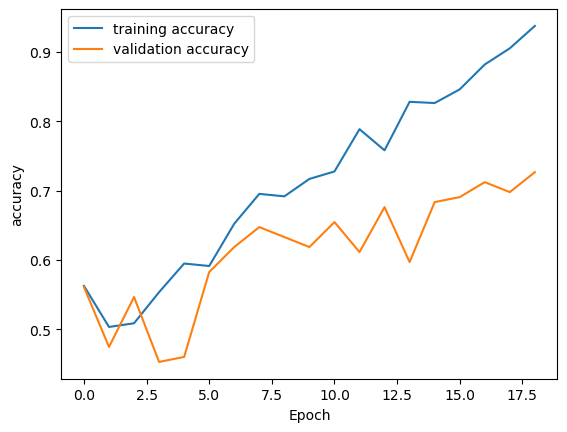

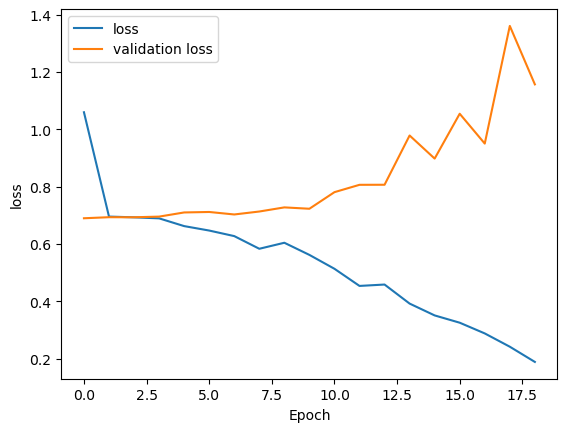

In [12]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


# Testing accuracy and loss score

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r"D:\jupyter notebook\project4 image classification\test",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 140 images belonging to 2 classes.


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.9050 - loss: 0.4092
Test Loss: 0.43184804916381836
Test Accuracy: 0.8999999761581421
